In [19]:
#load tools
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import preprocessing as prep

In [20]:
#load file 1
confirmed_data = pd.read_csv("time_series_2019-ncov-Confirmed.csv")
confirmed_data

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        2        3   
1              NaN             Japan  36.0000  138.0000        2        1   
2              NaN         Singapore   1.2833  103.8333        0        1   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/20  3/12/20  3/13/20  \
0          5        7        8        8  ...       59       70       75   
1          2        2        4        4  ...      639      639      701   
2          3        3        4        5  ...      178      178      200   
3          0        1        1        1  ...        1        1        1   
4          0        3        4        4  ...      149      149      197   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  
0         82      114      147      177      212      272      322  
1        773      839      825      878      889      924      963  
2        212      226      243      266      313      345      385  
3          1        1        1        1        1        1        1  
4        238      428      566      673      790      900     1030  
..       ...      ...      ...      ...      ...      ...      ...  
472        0        0        0        0        0        0        1  
473        0        0        0        0        0        0        1  
474        0        0        0        0        0        0        1  
475        0        0        0        0        0        0        1  
476        0        0        0        0        0        0        1  

[477 rows x 63 columns]

In [21]:
#load file 2
deaths_data = pd.read_csv("time_series_2019-ncov-Deaths.csv")
deaths_data

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        0        0   
1              NaN             Japan  36.0000  138.0000        0        0   
2              NaN         Singapore   1.2833  103.8333        0        0   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/20  3/12/20  3/13/20  \
0          0        0        0        0  ...        1        1        1   
1          0        0        0        0  ...       15       16       19   
2          0        0        0        0  ...        0        0        0   
3          0        0        0        0  ...        0        0        0   
4          0        0        0        0  ...        0        0        0   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  
0          1        1        1        1        1        1        1  
1         22       22       27       29       29       29       33  
2          0        0        0        0        0        0        0  
3          0        0        0        0        0        0        0  
4          0        0        0        2        2        2        3  
..       ...      ...      ...      ...      ...      ...      ...  
472        0        0        0        0        0        0        0  
473        0        0        0        0        0        0        0  
474        0        0        0        0        0        0        0  
475        0        0        0        0        0        0        0  
476        0        0        0        0        0        0        0  

[477 rows x 63 columns]

In [22]:
#load file 3
recovered_data = pd.read_csv("time_series_2019-ncov-Recovered.csv")
recovered_data 

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        0        0   
1              NaN             Japan  36.0000  138.0000        0        0   
2              NaN         Singapore   1.2833  103.8333        0        0   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/11/20  3/12/20  3/13/20  \
0          0        0        2        2  ...       34       34       35   
1          0        0        1        1  ...      118      118      118   
2          0        0        0        0  ...       96       96       97   
3          0        0        0        0  ...        1        1        1   
4          0        0        0        0  ...       26       26       26   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  
0         35       35       35       41       42       42       42  
1        118      118      144      144      144      150      191  
2        105      105      109      114      114      114      124  
3          1        1        1        1        1        1        1  
4         35       42       42       49       60       75       87  
..       ...      ...      ...      ...      ...      ...      ...  
472        0        0        0        0        0        0        0  
473        0        0        0        0        0        0        0  
474        0        0        0        0        0        0        0  
475        0        0        0        0        0        0        0  
476        0        0        0        0        0        0        0  

[477 rows x 63 columns]

So all the data seems to be in order and identified by a common index among the three files, but I am only interested in the cumulative values for each location rather than individual values per date. I will add up the values for each file first.

Starting with confirmed cases:

In [23]:

#create a list so we can sum the relevant columns
column_list = list(confirmed_data)
column_list.remove("Province/State")
column_list.remove("Country/Region")
column_list.remove("Lat")
column_list.remove("Long")

In [24]:
#now we can sum and append to the end
confirmed_data["confirmed_sum"] = confirmed_data[column_list].sum(axis = 1)
confirmed_data

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        2        3   
1              NaN             Japan  36.0000  138.0000        2        1   
2              NaN         Singapore   1.2833  103.8333        0        1   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/12/20  3/13/20  3/14/20  \
0          5        7        8        8  ...       70       75       82   
1          2        2        4        4  ...      639      701      773   
2          3        3        4        5  ...      178      200      212   
3          0        1        1        1  ...        1        1        1   
4          0        3        4        4  ...      149      197      238   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  confirmed_sum  
0        114      147      177      212      272      322           3025  
1        839      825      878      889      924      963          14471  
2        226      243      266      313      345      385           5673  
3          1        1        1        1        1        1             56  
4        428      566      673      790      900     1030           6402  
..       ...      ...      ...      ...      ...      ...            ...  
472        0        0        0        0        0        1              1  
473        0        0        0        0        0        1              1  
474        0        0        0        0        0        1              1  
475        0        0        0        0        0        1              1  
476        0        0        0        0        0        1              1  

[477 rows x 64 columns]

In [25]:
#let's drop the unnecessary columns
confirmed_data.drop(confirmed_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
confirmed_data

Province/State    Country/Region      Lat      Long  confirmed_sum
0              NaN          Thailand  15.0000  101.0000           3025
1              NaN             Japan  36.0000  138.0000          14471
2              NaN         Singapore   1.2833  103.8333           5673
3              NaN             Nepal  28.1667   84.2500             56
4              NaN          Malaysia   2.5000  112.5000           6402
..             ...               ...      ...       ...            ...
472   Sint Maarten       Netherlands  18.0425  -63.0548              1
473            NaN             Niger  17.6078    8.0817              1
474            NaN  Papua New Guinea  -6.3150  143.9555              1
475    Isle of Man    United Kingdom  54.2361   -4.5481              1
476            NaN          Zimbabwe -20.0000   30.0000              1

[477 rows x 5 columns]

Then we move onto deaths:

In [26]:
#create a list so we can sum the relevant columns
column_list2 = list(deaths_data)
column_list2.remove("Province/State")
column_list2.remove("Country/Region")
column_list2.remove("Lat")
column_list2.remove("Long")

In [27]:
#now we can sum and append to the end
deaths_data["deaths_sum"] = deaths_data[column_list2].sum(axis = 1)
deaths_data

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        0        0   
1              NaN             Japan  36.0000  138.0000        0        0   
2              NaN         Singapore   1.2833  103.8333        0        0   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/12/20  3/13/20  3/14/20  \
0          0        0        0        0  ...        1        1        1   
1          0        0        0        0  ...       16       19       22   
2          0        0        0        0  ...        0        0        0   
3          0        0        0        0  ...        0        0        0   
4          0        0        0        0  ...        0        0        0   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  deaths_sum  
0          1        1        1        1        1        1          20  
1         22       27       29       29       29       33         337  
2          0        0        0        0        0        0           0  
3          0        0        0        0        0        0           0  
4          0        0        2        2        2        3           9  
..       ...      ...      ...      ...      ...      ...         ...  
472        0        0        0        0        0        0           0  
473        0        0        0        0        0        0           0  
474        0        0        0        0        0        0           0  
475        0        0        0        0        0        0           0  
476        0        0        0        0        0        0           0  

[477 rows x 64 columns]

In [28]:
#let's drop the unnecessary columns
deaths_data.drop(deaths_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
deaths_data

Province/State    Country/Region      Lat      Long  deaths_sum
0              NaN          Thailand  15.0000  101.0000          20
1              NaN             Japan  36.0000  138.0000         337
2              NaN         Singapore   1.2833  103.8333           0
3              NaN             Nepal  28.1667   84.2500           0
4              NaN          Malaysia   2.5000  112.5000           9
..             ...               ...      ...       ...         ...
472   Sint Maarten       Netherlands  18.0425  -63.0548           0
473            NaN             Niger  17.6078    8.0817           0
474            NaN  Papua New Guinea  -6.3150  143.9555           0
475    Isle of Man    United Kingdom  54.2361   -4.5481           0
476            NaN          Zimbabwe -20.0000   30.0000           0

[477 rows x 5 columns]

Finally, recovered:

In [29]:
#create a list so we can sum the relevant columns
column_list3 = list(recovered_data)
column_list3.remove("Province/State")
column_list3.remove("Country/Region")
column_list3.remove("Lat")
column_list3.remove("Long")

In [30]:
#now we can sum and append to the end
recovered_data["recovered_sum"] = recovered_data[column_list3].sum(axis = 1)
recovered_data

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        0        0   
1              NaN             Japan  36.0000  138.0000        0        0   
2              NaN         Singapore   1.2833  103.8333        0        0   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/12/20  3/13/20  3/14/20  \
0          0        0        2        2  ...       34       35       35   
1          0        0        1        1  ...      118      118      118   
2          0        0        0        0  ...       96       97      105   
3          0        0        0        0  ...        1        1        1   
4          0        0        0        0  ...       26       26       35   
..       ...      ...      ...      ...  ...      ...      ...      ...   
472        0        0        0        0  ...        0        0        0   
473        0        0        0        0  ...        0        0        0   
474        0        0        0        0  ...        0        0        0   
475        0        0        0        0  ...        0        0        0   
476        0        0        0        0  ...        0        0        0   

     3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  recovered_sum  
0         35       35       41       42       42       42           1101  
1        118      144      144      144      150      191           2279  
2        105      109      114      114      114      124           2554  
3          1        1        1        1        1        1             38  
4         42       42       49       60       75       87            920  
..       ...      ...      ...      ...      ...      ...            ...  
472        0        0        0        0        0        0              0  
473        0        0        0        0        0        0              0  
474        0        0        0        0        0        0              0  
475        0        0        0        0        0        0              0  
476        0        0        0        0        0        0              0  

[477 rows x 64 columns]

In [31]:
#let's drop the unnecessary columns
recovered_data.drop(recovered_data.iloc[:, 4:-1], axis = 'columns', inplace = True)
recovered_data

Province/State    Country/Region      Lat      Long  recovered_sum
0              NaN          Thailand  15.0000  101.0000           1101
1              NaN             Japan  36.0000  138.0000           2279
2              NaN         Singapore   1.2833  103.8333           2554
3              NaN             Nepal  28.1667   84.2500             38
4              NaN          Malaysia   2.5000  112.5000            920
..             ...               ...      ...       ...            ...
472   Sint Maarten       Netherlands  18.0425  -63.0548              0
473            NaN             Niger  17.6078    8.0817              0
474            NaN  Papua New Guinea  -6.3150  143.9555              0
475    Isle of Man    United Kingdom  54.2361   -4.5481              0
476            NaN          Zimbabwe -20.0000   30.0000              0

[477 rows x 5 columns]

Now let's merge the data files.

In [32]:
#join confirmed and deaths datasets
confirmed_deaths = pd.merge(confirmed_data, deaths_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths

Province/State    Country/Region      Lat      Long  confirmed_sum  \
0              NaN          Thailand  15.0000  101.0000           3025   
1              NaN             Japan  36.0000  138.0000          14471   
2              NaN         Singapore   1.2833  103.8333           5673   
3              NaN             Nepal  28.1667   84.2500             56   
4              NaN          Malaysia   2.5000  112.5000           6402   
..             ...               ...      ...       ...            ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548              1   
473            NaN             Niger  17.6078    8.0817              1   
474            NaN  Papua New Guinea  -6.3150  143.9555              1   
475    Isle of Man    United Kingdom  54.2361   -4.5481              1   
476            NaN          Zimbabwe -20.0000   30.0000              1   

     deaths_sum  
0            20  
1           337  
2             0  
3             0  
4             9  
..          ...  
472           0  
473           0  
474           0  
475           0  
476           0  

[477 rows x 6 columns]

In [33]:
#final merge
confirmed_deaths_recovered = pd.merge(confirmed_deaths, recovered_data, how= 'outer', left_on = ['Province/State', 'Country/Region', 'Lat', 'Long'], right_on = ['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_deaths_recovered

Province/State    Country/Region      Lat      Long  confirmed_sum  \
0              NaN          Thailand  15.0000  101.0000           3025   
1              NaN             Japan  36.0000  138.0000          14471   
2              NaN         Singapore   1.2833  103.8333           5673   
3              NaN             Nepal  28.1667   84.2500             56   
4              NaN          Malaysia   2.5000  112.5000           6402   
..             ...               ...      ...       ...            ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548              1   
473            NaN             Niger  17.6078    8.0817              1   
474            NaN  Papua New Guinea  -6.3150  143.9555              1   
475    Isle of Man    United Kingdom  54.2361   -4.5481              1   
476            NaN          Zimbabwe -20.0000   30.0000              1   

     deaths_sum  recovered_sum  
0            20           1101  
1           337           2279  
2             0           2554  
3             0             38  
4             9            920  
..          ...            ...  
472           0              0  
473           0              0  
474           0              0  
475           0              0  
476           0              0  

[477 rows x 7 columns]

Now we clean the data.

In [34]:
#check for null values
confirmed_deaths_recovered.isnull().sum()

Province/State    153
Country/Region      0
Lat                 0
Long                0
confirmed_sum       0
deaths_sum          0
recovered_sum       0
dtype: int64

It looks like JHU was pretty meticulous in recording most of the data, but there are a significant amount of values missing in the Province/State column. Since there is no way to specify the values by taking the average or filling with the most common value, we can go ahead and drop that column. In addition, the latitudes and longitudes are no longer relevant as a result.

In [35]:
#drop columns
confirmed_deaths_recovered.drop('Province/State', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Lat', axis = 'columns', inplace = True)
confirmed_deaths_recovered.drop('Long', axis = 'columns', inplace = True)

When we look at the data, a lot of the Country/Region values are repeated since cases were reported in various regions of the same country. For the sake of this project, I am going to eliminate the duplicates by combining the values for each country together.

In [36]:
#select all duplicate rows based on one column
duplicates = confirmed_deaths_recovered[confirmed_deaths_recovered.duplicated(['Country/Region'])]
duplicates

Country/Region  confirmed_sum  deaths_sum  recovered_sum
7         Australia            950           0            204
8         Australia           1019           0            141
19        Australia            372           0             74
22        Australia             55           0              0
49        Australia            308          20              0
..              ...            ...         ...            ...
461         Denmark              7           0              0
462          France              4           0              0
463  United Kingdom              4           0              0
472     Netherlands              1           0              0
475  United Kingdom              1           0              0

[315 rows x 4 columns]

In [37]:
#let's groupby and sum them up
confirmed_deaths_recovered['total_confirmed'] = confirmed_deaths_recovered.groupby(['Country/Region'])['confirmed_sum'].transform('sum')
confirmed_deaths_recovered['total_deaths'] = confirmed_deaths_recovered.groupby(['Country/Region'])['deaths_sum'].transform('sum')
confirmed_deaths_recovered['total_recovered'] = confirmed_deaths_recovered.groupby(['Country/Region'])['recovered_sum'].transform('sum')

confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0            Thailand           3025          20           1101   
1               Japan          14471         337           2279   
2           Singapore           5673           0           2554   
3               Nepal             56           0             38   
4            Malaysia           6402           9            920   
..                ...            ...         ...            ...   
472       Netherlands              1           0              0   
473             Niger              1           0              0   
474  Papua New Guinea              1           0              0   
475    United Kingdom              1           0              0   
476          Zimbabwe              1           0              0   

     total_confirmed  total_deaths  total_recovered  
0               3025            20             1101  
1              14471           337             2279  
2               5673             0             2554  
3                 56             0               38  
4               6402             9              920  
..               ...           ...              ...  
472            16031           373               14  
473                1             0                0  
474                1             0                0  
475            18816           584              607  
476                1             0                0  

[477 rows x 7 columns]

In [38]:
new_confirmed_deaths_recovered = confirmed_deaths_recovered.drop_duplicates(subset=['Country/Region'])
new_confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0            Thailand           3025          20           1101   
1               Japan          14471         337           2279   
2           Singapore           5673           0           2554   
3               Nepal             56           0             38   
4            Malaysia           6402           9            920   
..                ...            ...         ...            ...   
470            Angola              1           0              0   
471        Cabo Verde              1           0              0   
473             Niger              1           0              0   
474  Papua New Guinea              1           0              0   
476          Zimbabwe              1           0              0   

     total_confirmed  total_deaths  total_recovered  
0               3025            20             1101  
1              14471           337             2279  
2               5673             0             2554  
3                 56             0               38  
4               6402             9              920  
..               ...           ...              ...  
470                1             0                0  
471                1             0                0  
473                1             0                0  
474                1             0                0  
476                1             0                0  

[162 rows x 7 columns]

In [39]:
#we can reset the index and see what we are left with
new_confirmed_deaths_recovered.reset_index(drop=True, inplace=True)
new_confirmed_deaths_recovered

Country/Region  confirmed_sum  deaths_sum  recovered_sum  \
0            Thailand           3025          20           1101   
1               Japan          14471         337           2279   
2           Singapore           5673           0           2554   
3               Nepal             56           0             38   
4            Malaysia           6402           9            920   
..                ...            ...         ...            ...   
157            Angola              1           0              0   
158        Cabo Verde              1           0              0   
159             Niger              1           0              0   
160  Papua New Guinea              1           0              0   
161          Zimbabwe              1           0              0   

     total_confirmed  total_deaths  total_recovered  
0               3025            20             1101  
1              14471           337             2279  
2               5673             0             2554  
3                 56             0               38  
4               6402             9              920  
..               ...           ...              ...  
157                1             0                0  
158                1             0                0  
159                1             0                0  
160                1             0                0  
161                1             0                0  

[162 rows x 7 columns]

In [40]:
#drop columns
new_confirmed_deaths_recovered.drop('confirmed_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('deaths_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered.drop('recovered_sum', axis = 'columns', inplace = True)
new_confirmed_deaths_recovered

/Users/dragon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Country/Region  total_confirmed  total_deaths  total_recovered
0            Thailand             3025            20             1101
1               Japan            14471           337             2279
2           Singapore             5673             0             2554
3               Nepal               56             0               38
4            Malaysia             6402             9              920
..                ...              ...           ...              ...
157            Angola                1             0                0
158        Cabo Verde                1             0                0
159             Niger                1             0                0
160  Papua New Guinea                1             0                0
161          Zimbabwe                1             0                0

[162 rows x 4 columns]

The data is now merged and cleaned. We can experiment with transforming the data now.

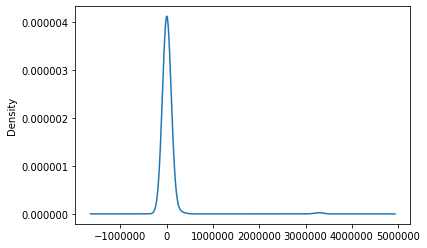

In [48]:
new_confirmed_deaths_recovered['total_confirmed'].plot.density()

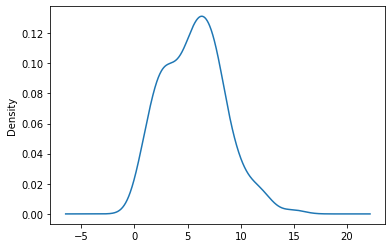

In [42]:
#try log to reach normal distribution
#get the log of the data
log_confirmed = (new_confirmed_deaths_recovered["total_confirmed"] + 1).apply(np.log) 

#plot density
log_confirmed.plot.density()

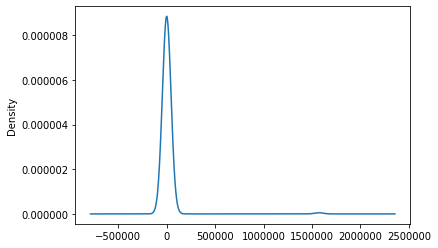

In [43]:
new_confirmed_deaths_recovered['total_recovered'].plot.density()

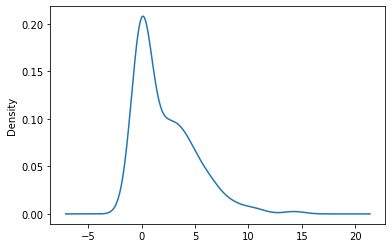

In [44]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_recovered"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()

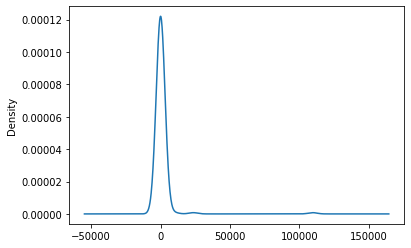

In [45]:
new_confirmed_deaths_recovered['total_deaths'].plot.density()

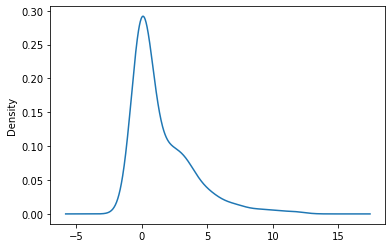

In [46]:
#try log to reach normal distribution
#get the log of the data
log_recovered = (new_confirmed_deaths_recovered["total_deaths"] + 1).apply(np.log) 

#plot density
log_recovered.plot.density()